In [190]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn 
import plotly.express as px

In [2]:
# !pip install plotly 

In [3]:
df = pd.read_csv("supermarket_sales.csv")

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,Ewallet


In [5]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Cash
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,Cash


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Payment        1000 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 93.9+ KB


In [7]:
df.dtypes

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Date              object
Payment           object
dtype: object

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Total            0
Date             0
Payment          0
dtype: int64

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749
std,26.494628,2.923431,11.708825,245.885335
min,10.080000,1.000000,0.508500,10.678500
25%,32.875000,3.000000,5.924875,124.422375
50%,55.230000,5.000000,12.088000,253.848000
75%,77.935000,8.000000,22.445250,471.350250
max,99.960000,10.000000,49.650000,1042.650000


In [12]:
df.select_dtypes("object").describe()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,02/07/2019,Ewallet
freq,1,340,340,501,501,178,20,345


In [14]:
df.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total
Unit price,1.000000,0.010778,0.633962,0.633962
Quantity,0.010778,1.000000,0.705510,0.705510
Tax 5%,0.633962,0.705510,1.000000,1.000000
Total,0.633962,0.705510,1.000000,1.000000


In [15]:
data = pd.DataFrame({"Name":["A" , "B" , "C" , np.nan] , "Age":[np.nan , 30 , 32 , np.nan]})

In [16]:
data

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0
3,NaN,NaN


In [23]:
data.dropna(inplace=True)  # axis = 0  >> rowsssss

In [24]:
data

,Name,Age
1,B,30.0
2,C,32.0


In [25]:
data = pd.DataFrame({"Name":["A" , "B" , "C" , np.nan] , "Age":[np.nan , 30 , 32 , np.nan]})

In [26]:
data

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0
3,NaN,NaN


In [27]:
data.dropna(axis=1)   #>> colssss

""
0
1
2
3


In [28]:
data

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0
3,NaN,NaN


In [30]:
data.dropna(thresh=1) #  على الاقل قيمة فعلية واحدة ف الرووو يعني مش هعمل حذف 

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0


In [31]:
data.dropna(how = "all")  # axis = 0 >> rowss #  ان كل الرو يكون نان 

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0


In [32]:
data.dropna(how = "any")   # axis = 0 >> rowsssss

,Name,Age
1,B,30.0
2,C,32.0


In [33]:
data.dropna(how="all" , axis = 1 )

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0
3,NaN,NaN


In [34]:
data.dropna(how="any" , axis = 1 )

""
0
1
2
3


In [35]:
data

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0
3,NaN,NaN


In [36]:
data["Age"].fillna(0)

0     0.0
1    30.0
2    32.0
3     0.0
Name: Age, dtype: float64

In [37]:
data["Age"].fillna(data["Age"].mean())

0    31.0
1    30.0
2    32.0
3    31.0
Name: Age, dtype: float64

In [38]:
data["Age"].fillna(method="ffill")

0     NaN
1    30.0
2    32.0
3    32.0
Name: Age, dtype: float64

In [39]:
data

,Name,Age
0,A,NaN
1,B,30.0
2,C,32.0
3,NaN,NaN


In [40]:
data["Age"].fillna(method="bfill")

0    30.0
1    30.0
2    32.0
3     NaN
Name: Age, dtype: float64

In [42]:
data["Name"].mode()[0]

'A'

In [43]:
data["Name"].fillna(data["Name"].mode()[0])

0    A
1    B
2    C
3    A
Name: Name, dtype: object

In [44]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,Ewallet


In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [80]:
x = [1,2,3,4,5,6]
y = [2,3,4,5,6,7]
y2 =[4,5,3,2,1,1] 

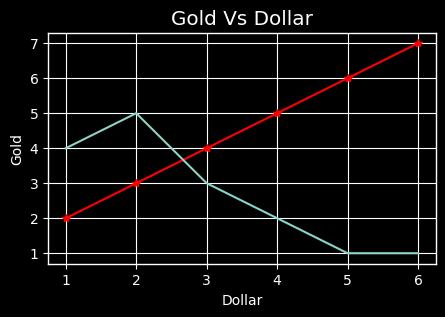

In [81]:
plt.style.use("dark_background")
plt.figure(figsize=(5,3))
plt.plot(x , y  , marker = "*" , color = "red")
plt.plot(x , y2)
plt.title("Gold Vs Dollar")
plt.xlabel("Dollar")
plt.ylabel("Gold")
plt.show()

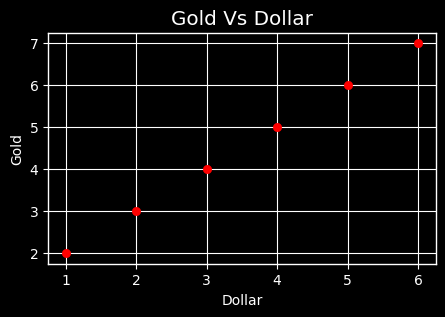

In [87]:
x = [1,2,3,4,5,6]
y = [2,3,4,5,6,7]
y2 =[4,5,3,2,1,1] 
plt.figure(figsize=(5,3))
plt.scatter(x , y  , color = "red")
plt.title("Gold Vs Dollar")
plt.xlabel("Dollar")
plt.ylabel("Gold")
plt.show()

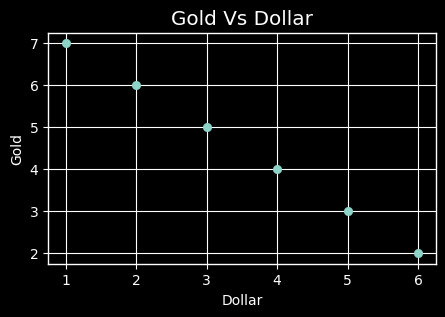

In [88]:
# [2,3,4,5,6,7]
y = [7,6,5,4,3,2]
plt.figure(figsize=(5,3))
plt.scatter(x , y )
plt.title("Gold Vs Dollar")
plt.xlabel("Dollar")
plt.ylabel("Gold")
plt.show()

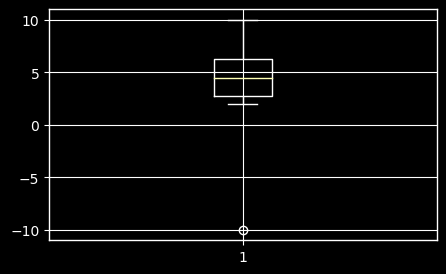

In [89]:
y = [7,6,5,4,3,2,10,-10]
plt.figure(figsize=(5,3))
plt.boxplot(y)
plt.show()

(array([1., 0., 0., 0., 0., 0., 2., 2., 2., 1.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <BarContainer object of 10 artists>)

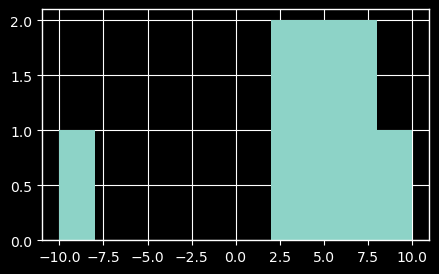

In [101]:
y = [7,6,5,4,3,2,10,-10]
plt.figure(figsize=(5,3))
plt.hist(y , bins=10)
# plt.show()

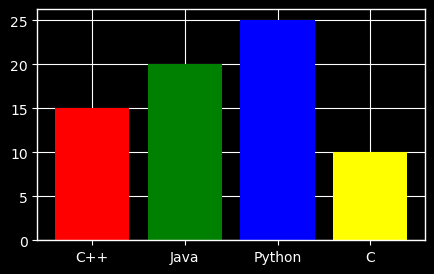

In [98]:
x = ["C++" , "Java" , "Python" , "C"]
y = [15 , 20 , 25 , 10]
color = ["red" , "green" , "blue" , "yellow"]
plt.figure(figsize=(5,3))
plt.bar(x , y , color = color )
plt.show()

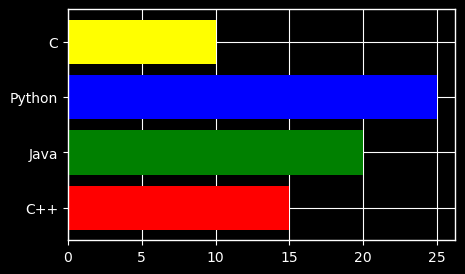

In [102]:
x = ["C++" , "Java" , "Python" , "C"]
y = [15 , 20 , 25 , 10]
color = ["red" , "green" , "blue" , "yellow"]
plt.figure(figsize=(5,3))
plt.barh(x , y , color = color )
plt.show()

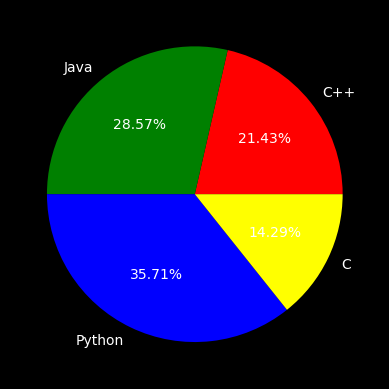

In [111]:
x = ["C++" , "Java" , "Python" , "C"]
y = [15 , 20 , 25 , 10]
color = ["red" , "green" , "blue" , "yellow"]
plt.style.use("dark_background")
plt.pie(y , labels=x , autopct="%1.2f%%" , colors=color)
plt.show()

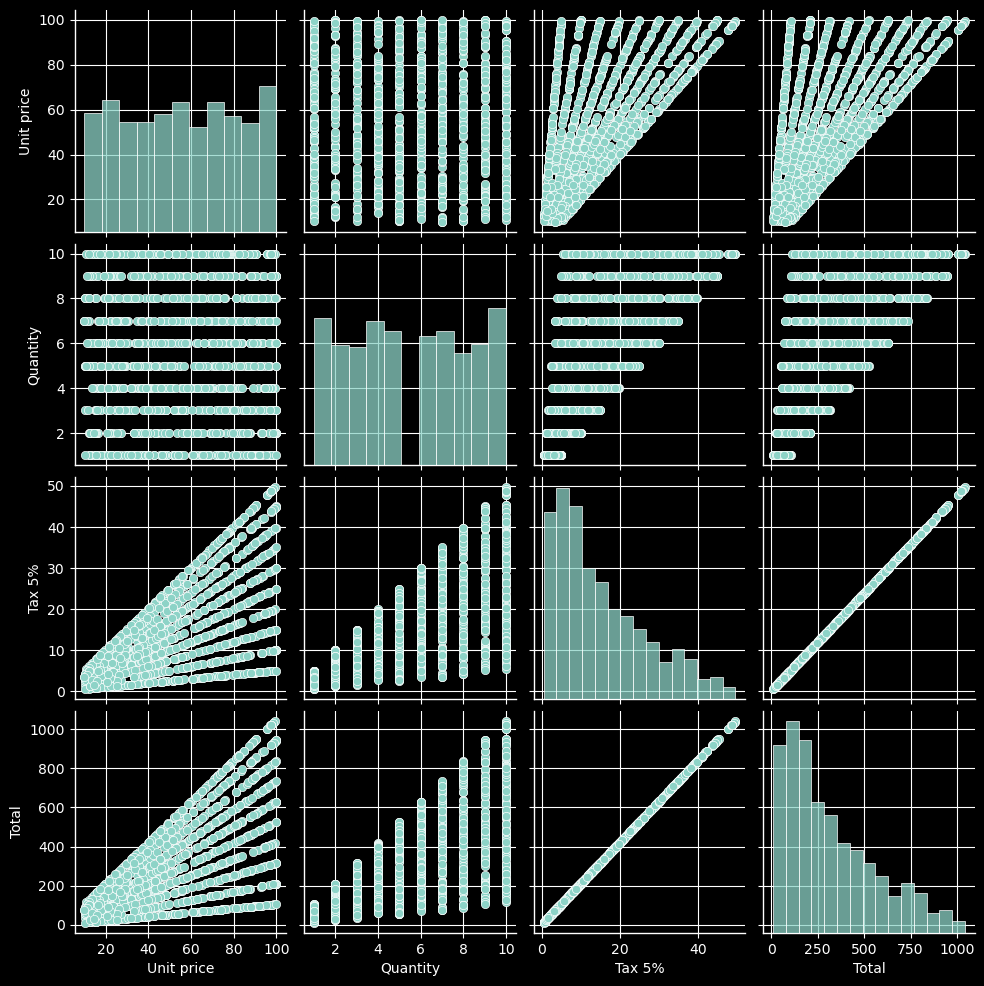

In [112]:
sns.pairplot(df) # number

In [113]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Payment'],
      dtype='object')

<Axes: xlabel='Date', ylabel='Total'>

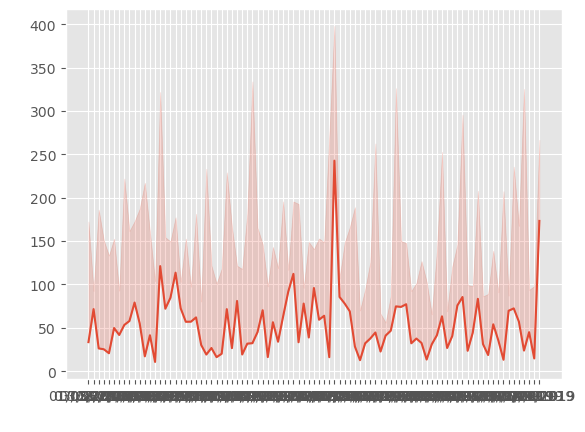

In [122]:
plt.style.use("ggplot")
sns.lineplot(x = df["Date"] , y = df["Total"]  , estimator=min) # estimator = mean

In [116]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,Ewallet
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Cash


In [139]:
D_T = df.groupby("Date")["Total"].agg(["max" , "mean", "min" ,  "count"])
D_T.reset_index(inplace=True)

In [140]:
D_T

,Date,max,mean,min,count
0,01/01/2019,888.6150,395.431750,113.5680,12
1,01/02/2019,383.7645,243.187875,44.5935,8
2,01/03/2019,520.8000,259.766062,44.3520,8
3,01/04/2019,629.8425,270.614750,75.7785,6
4,01/05/2019,690.0180,294.723625,33.4950,12
...,...,...,...,...,...
84,3/26/2019,530.6700,150.962538,41.0760,13
85,3/27/2019,943.2990,290.281950,91.8225,10
86,3/28/2019,525.2310,222.940200,74.0880,10
87,3/29/2019,922.6350,502.905375,121.1280,8


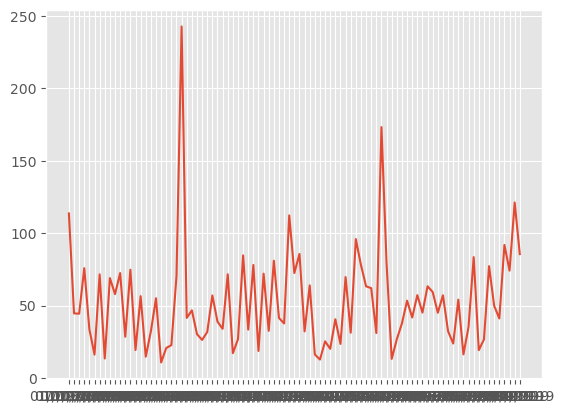

In [141]:
plt.plot(D_T["Date"] , D_T["min"])

In [142]:
px.line(x =D_T["Date"] , y =  D_T["min"] )

In [143]:
px.line(x =D_T["Date"] , y =  D_T["max"] )

In [135]:
df[df["Date"]=="01/01/2019"]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,01/01/2019,Credit card
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,01/01/2019,Cash
450,891-01-7034,B,Mandalay,Normal,Female,Electronic accessories,74.71,6,22.413,470.673,01/01/2019,Cash
484,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,01/01/2019,Credit card
496,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,01/01/2019,Cash
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,01/01/2019,Cash
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,01/01/2019,Cash
696,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,01/01/2019,Ewallet
829,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,01/01/2019,Credit card
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,01/01/2019,Ewallet


In [144]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,Ewallet


<BarContainer object of 1000 artists>

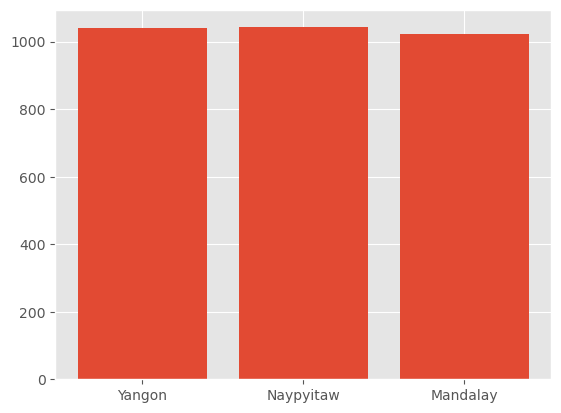

In [145]:
plt.bar(df["City"] , df["Total"])

In [150]:
df.groupby("City")["Total"].min()

City
Mandalay     18.6375
Naypyitaw    10.6785
Yangon       12.6945
Name: Total, dtype: float64

<Axes: xlabel='City', ylabel='Total'>

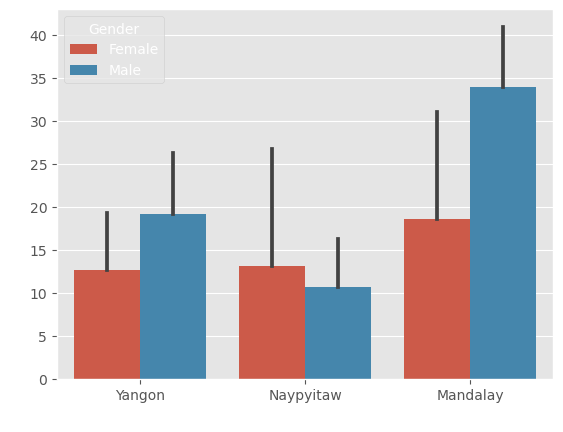

In [160]:
sns.barplot(x = df["City"] , y = df["Total"] , estimator=min , hue = df["Gender"])

<Axes: xlabel='City', ylabel='Total'>

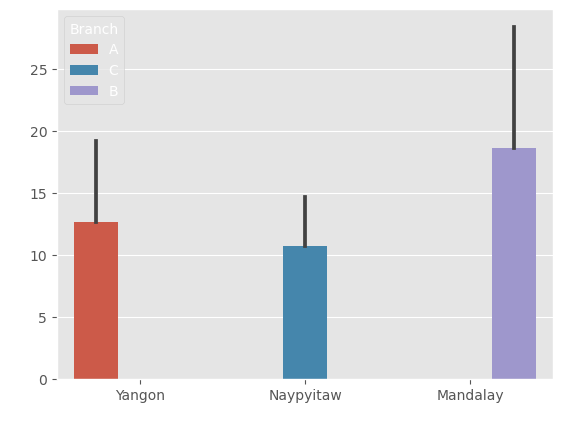

In [161]:
sns.barplot(x = df["City"] , y = df["Total"] , estimator="min" , hue = df["Branch"] )

In [162]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01/05/2019,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03/08/2019,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03/03/2019,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02/08/2019,Ewallet
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03/02/2019,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02/09/2019,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Cash


<Axes: xlabel='Branch', ylabel='count'>

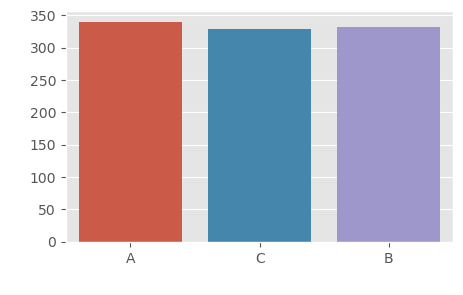

In [164]:
plt.figure(figsize=(5,3))

sns.countplot(x = df["Branch"])

In [165]:
df["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [176]:
index = df["Branch"].value_counts().index

In [177]:
value = df["Branch"].value_counts().values

<BarContainer object of 3 artists>

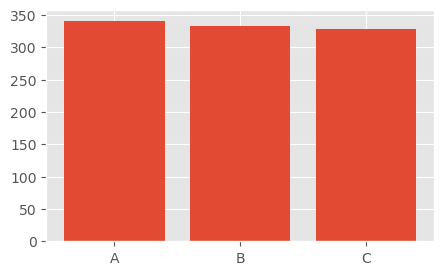

In [178]:
plt.figure(figsize=(5,3))
plt.bar(index , value)

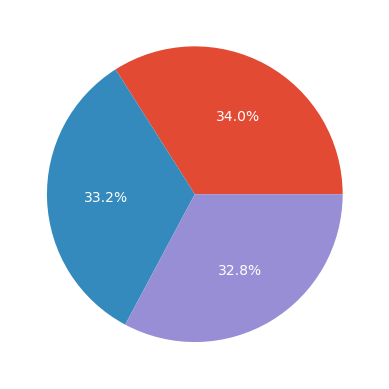

In [182]:
plt.pie(value , labels=index  , autopct="%1.1f%%")
plt.show()

In [183]:
df.corr(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total
Unit price,1.000000,0.010778,0.633962,0.633962
Quantity,0.010778,1.000000,0.705510,0.705510
Tax 5%,0.633962,0.705510,1.000000,1.000000
Total,0.633962,0.705510,1.000000,1.000000


<Axes: >

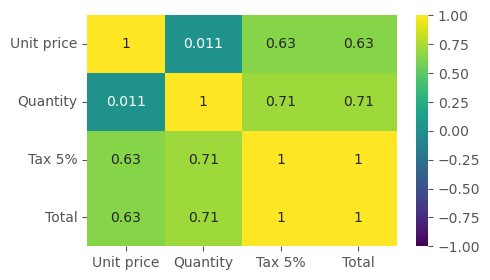

In [188]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(numeric_only=True) , cmap = 'viridis' ,  vmin = -1, vmax = 1 , annot = True)

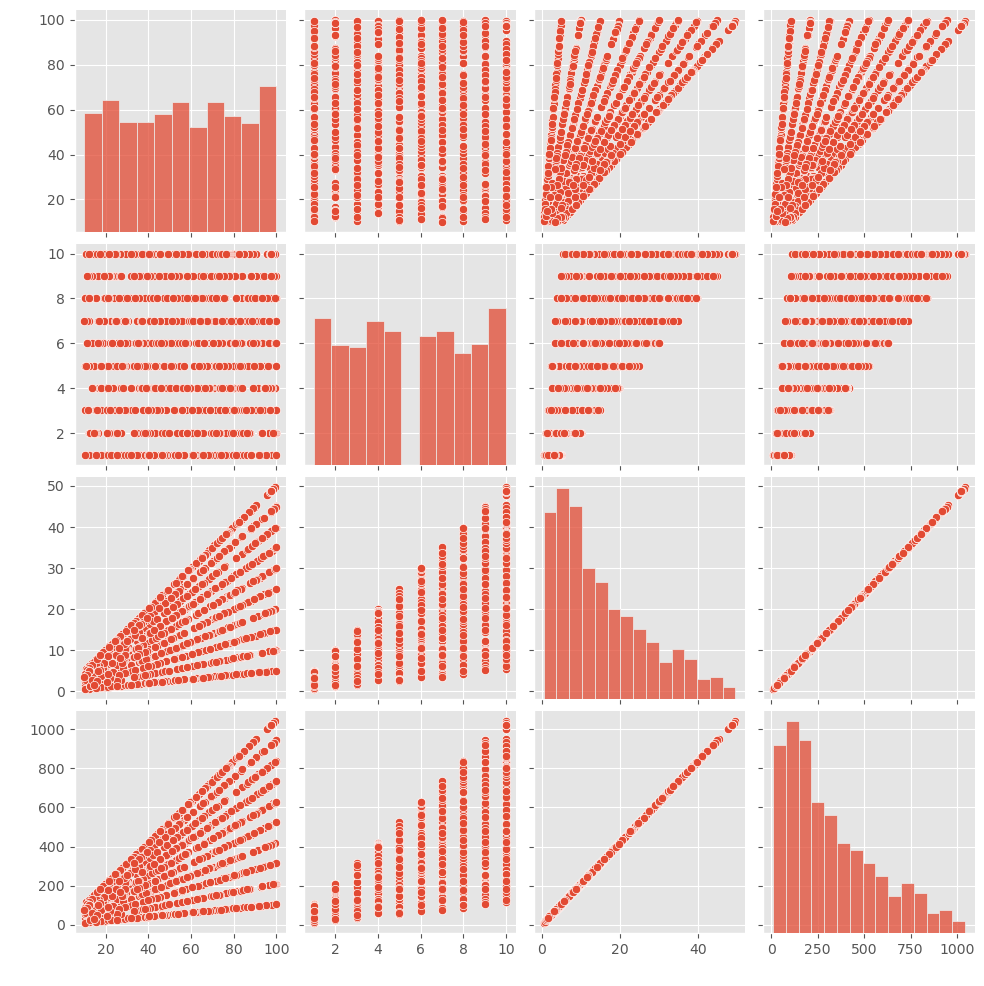

In [189]:
sns.pairplot(df)

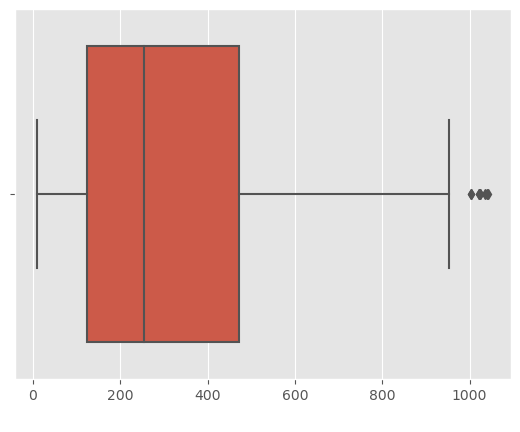

In [210]:
sns.boxplot(x = df["Total"])
plt.show()

<Axes: xlabel='Total', ylabel='Count'>

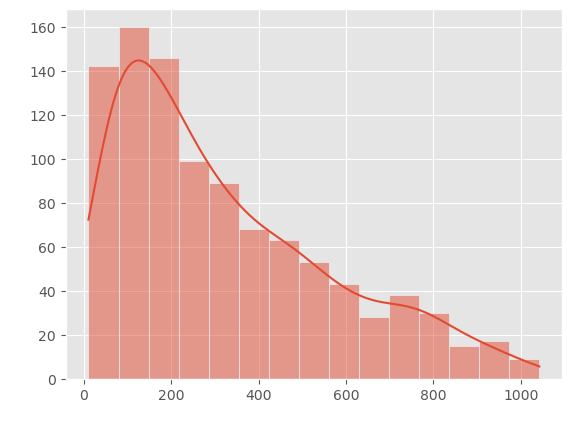

In [195]:
sns.histplot(x = df["Total"] , kde = True)

In [196]:
df.describe()

,Unit price,Quantity,Tax 5%,Total
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749
std,26.494628,2.923431,11.708825,245.885335
min,10.080000,1.000000,0.508500,10.678500
25%,32.875000,3.000000,5.924875,124.422375
50%,55.230000,5.000000,12.088000,253.848000
75%,77.935000,8.000000,22.445250,471.350250
max,99.960000,10.000000,49.650000,1042.650000


In [197]:
q1 = df["Total"].quantile(.25)
q1

124.422375

In [198]:
q3 = df["Total"].quantile(.75)
q3

471.35024999999996

In [199]:
IQR = q3 - q1 
IQR

346.927875

In [200]:
lower = q1 - (1.5 * IQR)
lower

-395.9694375

In [201]:
upper = q3 + (1.5 * IQR)
upper

991.7420625

In [204]:
df_without_out = df[df["Total"] <= upper]

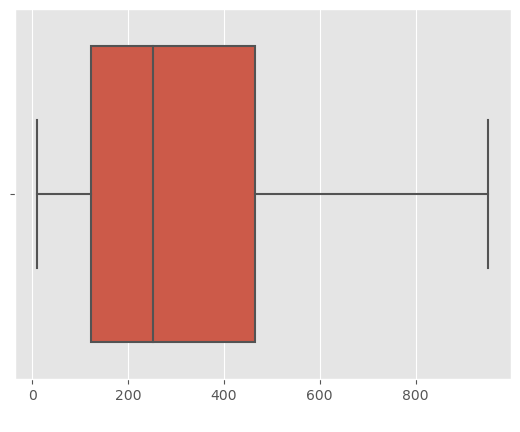

In [205]:
sns.boxplot(x = df_without_out["Total"])
plt.show()

<Axes: xlabel='Total', ylabel='Count'>

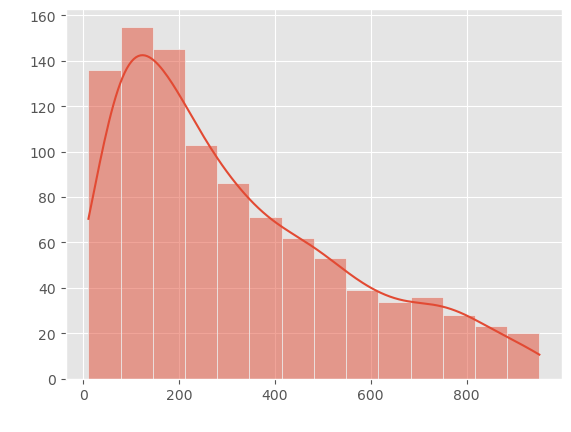

In [206]:
sns.histplot(x = df_without_out["Total"] , kde = True)

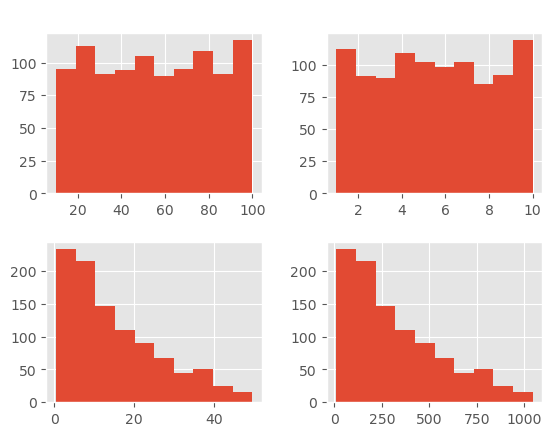

In [213]:
df.select_dtypes("number").hist();

<Axes: >

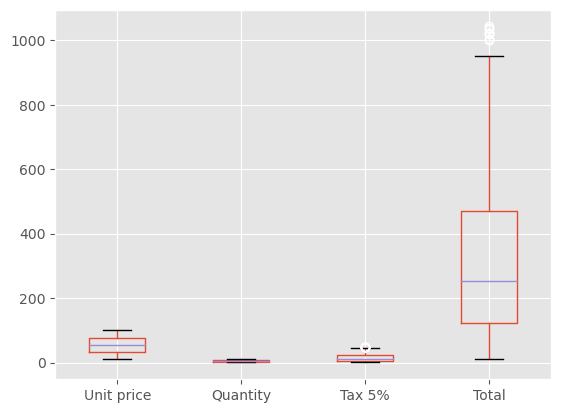

In [214]:
df.select_dtypes("number").boxplot()

In [216]:
col_num = df.select_dtypes("number").columns

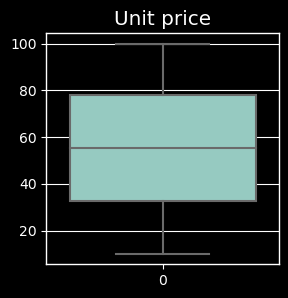

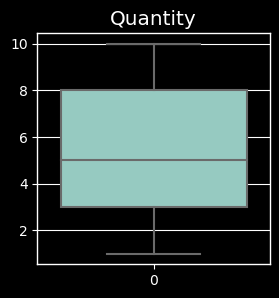

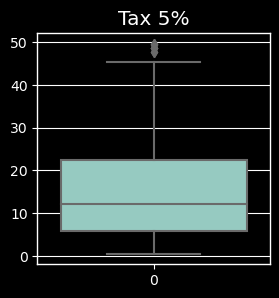

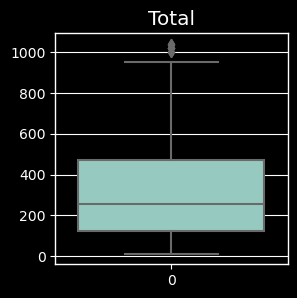

In [224]:
for i in col_num:
    plt.figure(figsize=(3,3))
    plt.style.use("dark_background")
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Quantity'>

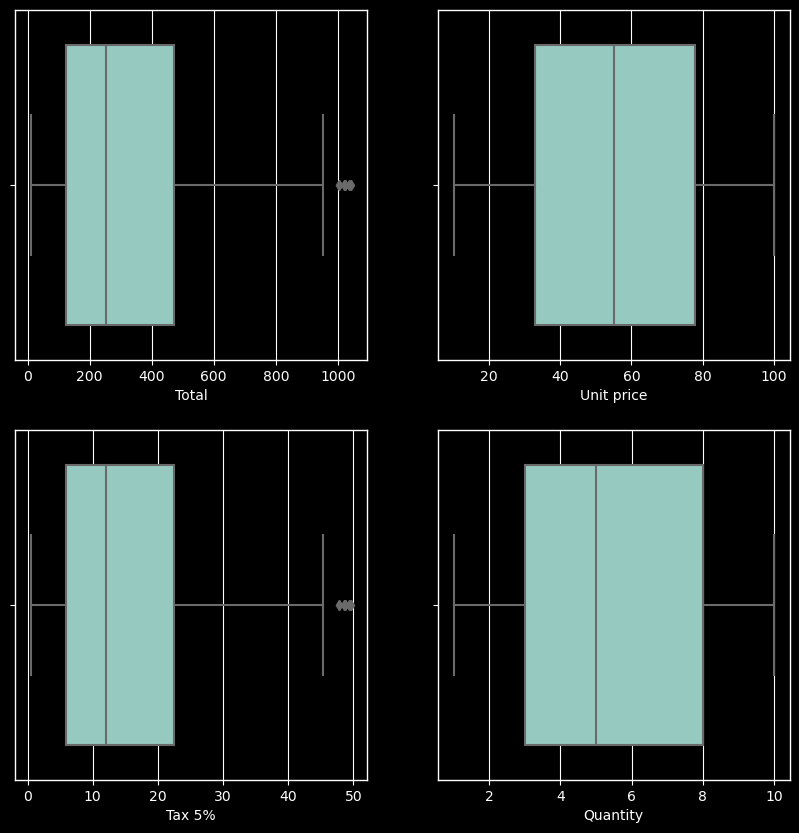

In [235]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x = df["Total"])
plt.subplot(2,2,2)
sns.boxplot(x = df["Unit price"])
plt.subplot(2,2,3)
sns.boxplot(x = df["Tax 5%"])
plt.subplot(2,2,4)
sns.boxplot(x = df["Quantity"])


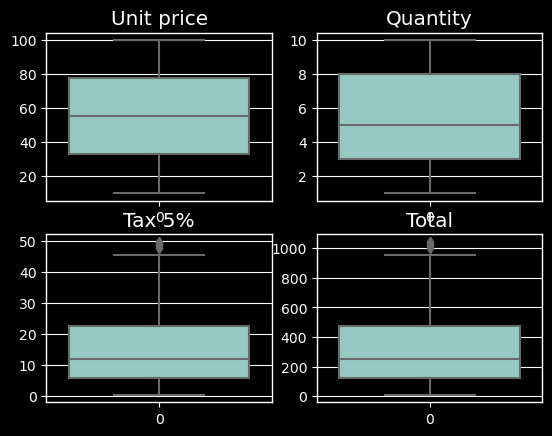

In [236]:
for index,col in enumerate( col_num):
    plt.subplot(2,2,index+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.show()